# Estudo e explora√ß√£o dos dados para o Tech Challenge

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator
import numpy as np
from datetime import datetime
from cycler import cycler

In [2]:
#O arquivo t√° com as colunas separadas por tabula√ß√£o, separador √© '\t'
vinhos_inicial = pd.read_csv('vinhoexp.csv', sep='\t', thousands='.', decimal=',')

vinhos_inicial.drop(columns=['Id'], inplace=True)

#o df tem duas colunas para cada ano, sendo elas 'quantidade (Kg)' e 'Valor (US$)'
#primeiro passo agora √©: corrigir os nomes das colunas, alternando entre Quantidade e Valor (US$)

colunas_atuais = vinhos_inicial.columns[1:]  #ignorando a coluna dos pa√≠ses
novas_colunas = []

for i, col in enumerate(colunas_atuais):

    tipo = 'Quantidade' if i % 2 == 0 else 'Valor'

    novas_colunas.append(f'{tipo}_{col}')

vinhos_inicial.columns = ['Pa√≠s'] + novas_colunas


#separando colunas de quantidade e valor
quantidade_cols = [col for col in vinhos_inicial.columns if col.startswith('Quantidade')]
valor_cols = [col for col in vinhos_inicial.columns if col.startswith('Valor')]


#vou fazer a tabela ficar no formato "longo", com uma coluna para ano, quantidade e valor. Acredito que esse formato vai ser o ideal para trabalhar com os dados depois.
#Para isso, vou usar a fun√ß√£o melt do pandas!!

df_qtd = vinhos_inicial.melt(id_vars='Pa√≠s', value_vars=quantidade_cols, var_name='Ano', value_name='Quantidade_L')
df_valor = vinhos_inicial.melt(id_vars='Pa√≠s', value_vars=valor_cols, var_name='Ano', value_name='Valor_USD')


#agora, √© extrair o ano da coluna (limpar)

df_qtd['Ano'] = df_qtd['Ano'].str.extract(r'(\d+)', expand=False)
df_valor['Ano'] = df_valor['Ano'].str.extract(r'(\d+)', expand=False)


#por fim, tenho que juntar os dois dataframes e depois ajustar os tipos pra ficar certinho

vinhos = pd.merge(df_qtd, df_valor, on=['Pa√≠s', 'Ano']) #juntando com a base nas colunas ano e pa√≠s :)

vinhos['Ano'] = vinhos['Ano'].astype(int)

vinhos['Quantidade_L'] = pd.to_numeric(vinhos['Quantidade_L'], errors='coerce').fillna(0) #o .fillna(0) substitui os valores inexistentes por zero, pra garantir que ta tudo bonitinho e certinho pra n dar problema no futuro

vinhos['Valor_USD'] = pd.to_numeric(vinhos['Valor_USD'], errors='coerce').fillna(0)


vinhos




Pa√≠s   Ano  Quantidade_L  Valor_USD
0                         Afeganist√£o  1970             0          0
1                       √Åfrica do Sul  1970             0          0
2     Alemanha, Rep√∫blica Democr√°tica  1970             0          0
3                              Angola  1970             0          0
4                            Anguilla  1970             0          0
...                               ...   ...           ...        ...
7750                           Tuvalu  2024             0          0
7751                          Uruguai  2024         36729      62325
7752                          Vanuatu  2024             0          0
7753                        Venezuela  2024        122922     199418
7754                           Vietn√£  2024            16         41

[7755 rows x 4 columns]

In [3]:
#Pr√≥ximo passo: Filtrar os dados para 2010 at√© 2024!

vinhos = vinhos[(vinhos['Ano'] >= 2010) & (vinhos['Ano'] <= 2024)]

vinhos

Pa√≠s   Ano  Quantidade_L  Valor_USD
5640                      Afeganist√£o  2010             0          0
5641                    √Åfrica do Sul  2010             0          0
5642  Alemanha, Rep√∫blica Democr√°tica  2010         27715     138666
5643                           Angola  2010         33557     189891
5644                         Anguilla  2010             0          0
...                               ...   ...           ...        ...
7750                           Tuvalu  2024             0          0
7751                          Uruguai  2024         36729      62325
7752                          Vanuatu  2024             0          0
7753                        Venezuela  2024        122922     199418
7754                           Vietn√£  2024            16         41

[2115 rows x 4 columns]

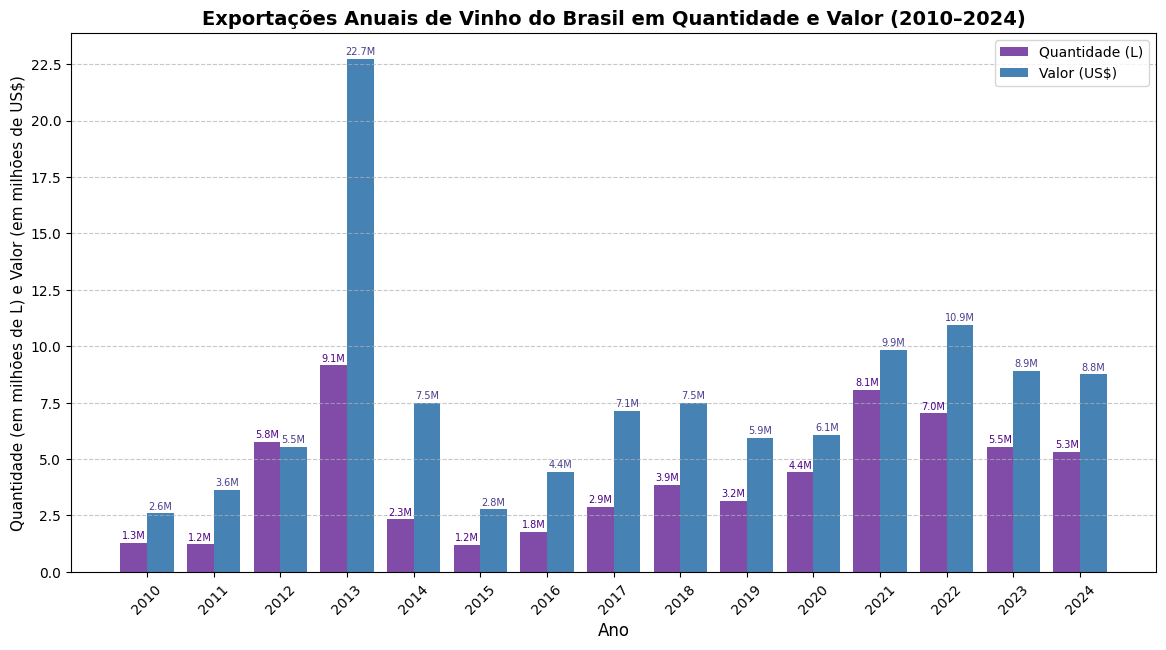

In [ ]:
#Agora, vou fazer um gr√°fico de barras com as exporta√ß√µes (em qtd e valor) por ano

#primeiro, soma a quantidade total e valor total por ano
vinhos_soma = vinhos.groupby('Ano')[['Quantidade_L', 'Valor_USD']].sum().reset_index()


largura = 0.4
anos = vinhos_soma['Ano']
x = np.arange(len(anos))

fig, ax = plt.subplots(figsize=(14, 7))

ax.bar(x - largura/2, vinhos_soma['Quantidade_L'], width=largura, label='Quantidade (L)', color='indigo', alpha = 0.7)
ax.bar(x + largura/2, vinhos_soma['Valor_USD'], width=largura, label='Valor (US$)', color='steelblue', alpha = 1) #gostei da paleta de cores, ficou bem equilibrado :)


ax.set_xlabel('Ano', fontsize=12)
ax.set_ylabel('Quantidade (em milh√µes de L) e Valor (em milh√µes de US$)', fontsize=11)
ax.set_title('Exporta√ß√µes Anuais de Vinho do Brasil em Quantidade e Valor (2010‚Äì2024)', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(anos, rotation=45)
ax.legend(loc='upper right', frameon=True)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e6:,.1f}')) #dividindo os dados (n√£o os do df) por 1 milh√£o pra melhorar a visualiza√ß√£o	
ax.yaxis.set_major_locator(MultipleLocator(2.5e6))  #ticks a cada 2.5 milh√µes


#adicionando os valores acima das barras
for i in range(len(anos)):
    ax.text(x[i] - largura/2, vinhos_soma['Quantidade_L'][i] + 0.1e6, f'{vinhos_soma["Quantidade_L"][i]/1e6:.1f}M', ha='center', va='bottom', fontsize=7, color='indigo')
    
    ax.text(x[i] + largura/2, vinhos_soma['Valor_USD'][i] + 0.1e6, f'{vinhos_soma["Valor_USD"][i]/1e6:.1f}M', ha='center', va='bottom', fontsize=7, color='darkslateblue')


plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


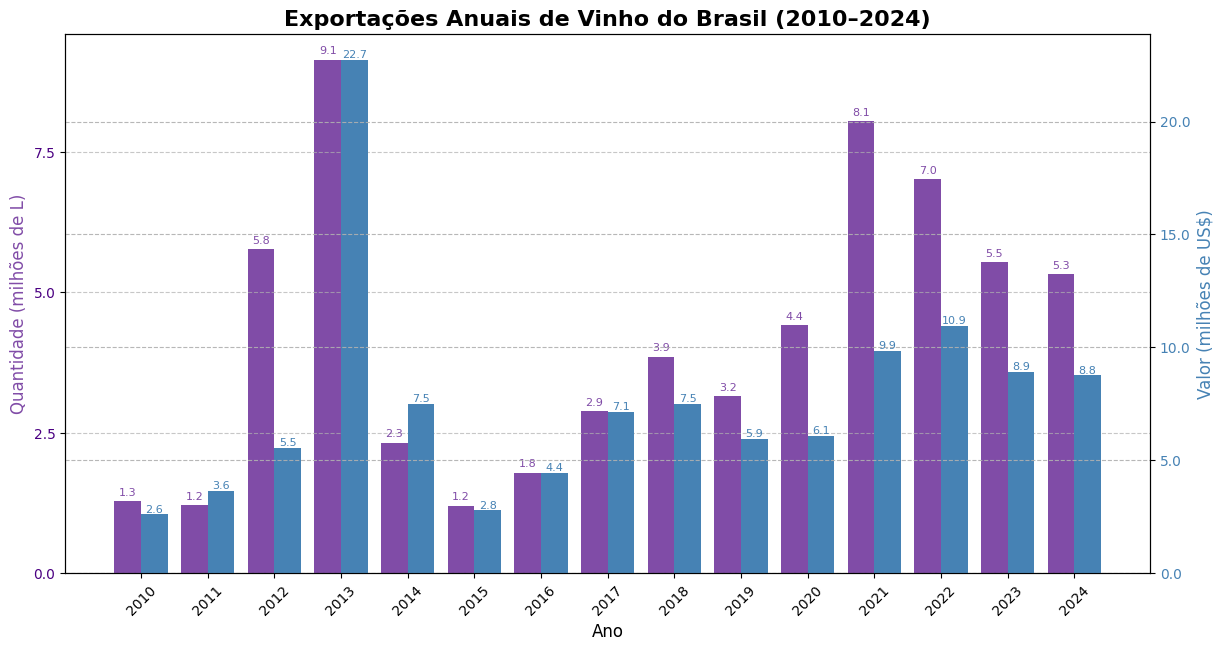

In [22]:
#agora fazendo um gr√°fico com dois eixos Y, para ver se ele fica mais claro do que o outro ou n√£o

largura = 0.4
anos = vinhos_soma['Ano']
x = np.arange(len(anos))

fig, ax1 = plt.subplots(figsize=(14, 7))

#primeiro eixo (esquerda) - Quantidade
barras1 = ax1.bar(x - largura/2, vinhos_soma['Quantidade_L'], width=largura, color='indigo', alpha = 0.7, label='Quantidade (L)')
ax1.set_ylabel('Quantidade (milh√µes de L)', fontsize=12, color='indigo', alpha = 0.7)
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.1f}'))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(2.5e6))
ax1.tick_params(axis='y', labelcolor='indigo')

#segundo eixo (direita) - Valor
ax2 = ax1.twinx()
barras2 = ax2.bar(x + largura/2, vinhos_soma['Valor_USD'], width=largura, color='steelblue', label='Valor (US$)')
ax2.set_ylabel('Valor (milh√µes de US$)', fontsize=12, color='steelblue')
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.1f}'))
ax2.tick_params(axis='y', labelcolor='steelblue')

#r√≥tulos, t√≠tulo e etc
ax1.set_xlabel('Ano', fontsize=12)
ax1.set_title('Exporta√ß√µes Anuais de Vinho do Brasil (2010‚Äì2024)', fontsize=16, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(anos, rotation=45)

#adicionar valores sobre as barras
for i in range(len(anos)):
    ax1.text(x[i] - largura/2, vinhos_soma['Quantidade_L'][i] + 0.1e6, f'{vinhos_soma["Quantidade_L"][i]/1e6:.1f}', ha='center', fontsize=8, color='indigo', alpha = 0.7)
    ax2.text(x[i] + largura/2, vinhos_soma['Valor_USD'][i] + 0.1e6, f'{vinhos_soma["Valor_USD"][i]/1e6:.1f}', ha='center', fontsize=8, color='steelblue')

#grids nos dois eixos? continua esquisito 
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax2.grid(axis='y', linestyle='--', alpha=0.9)

plt.show()

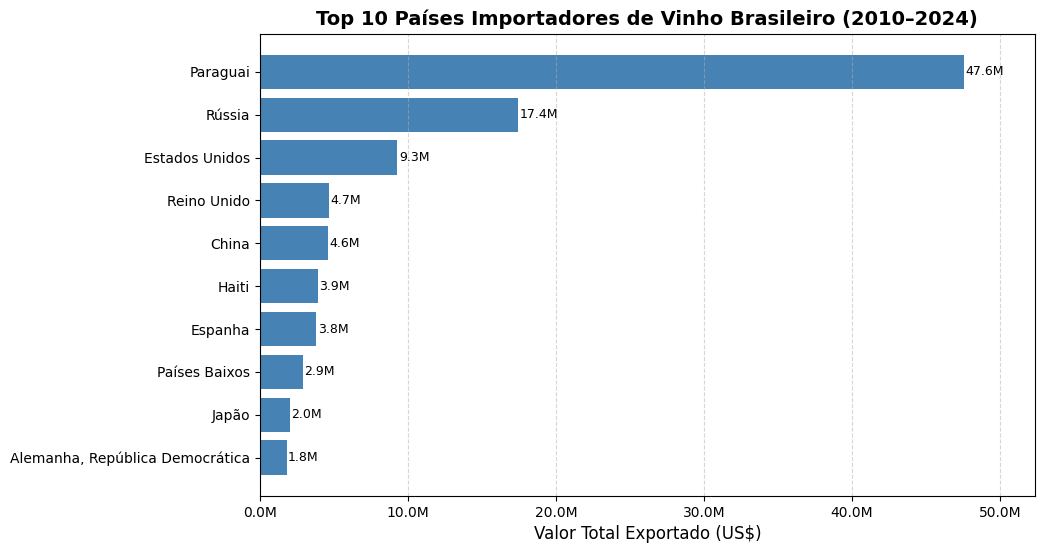

In [16]:
#conclus√£o: acho que ficou uma bosta o gr√°fico com dois eixos. Ficou super confuso, apesar de mais verticalmente equilibrado. DESCARTADO!
#pr√≥xima tentativa: gr√°fico por pa√≠s (top 5 ou top 10?)
#escolher qual abordagem usar: ranking total acumulado; ano mais recente; evolu√ß√£o ano a ano por pa√≠s etc. (talvez todas?)

#come√ßando por ranking total acumulado:

ranking_paises = vinhos.groupby('Pa√≠s')['Valor_USD'].sum().sort_values(ascending=False).head(10)  #agrupa e soma valor total por pa√≠s

#Vou fazer um gr√°fico de barras horizontais, acho que √© o que mais combina com um ranking
fig, ax = plt.subplots(figsize=(10, 6))
ranking_paises = ranking_paises.sort_values()  # ordena de baixo para cima no gr√°fico
bars = ax.barh(ranking_paises.index, ranking_paises.values, color='steelblue')

#adicionando r√≥tulos nas barras
for bar in bars:
    width = bar.get_width()
    ax.text(width + 1e5, bar.get_y() + bar.get_height()/2, f'{width/1e6:.1f}M', va='center', fontsize=9)

ax.set_xlabel('Valor Total Exportado (US$)', fontsize=12)
ax.set_title('Top 10 Pa√≠ses Importadores de Vinho Brasileiro (2010‚Äì2024)', fontsize=14, fontweight='bold')
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
ax.grid(axis='x', linestyle='--', alpha=0.5)
ax.set_xlim(0, ranking_paises.max() * 1.1)  # adiciona um pouco de espa√ßo √† direita do gr√°fico

plt.show()


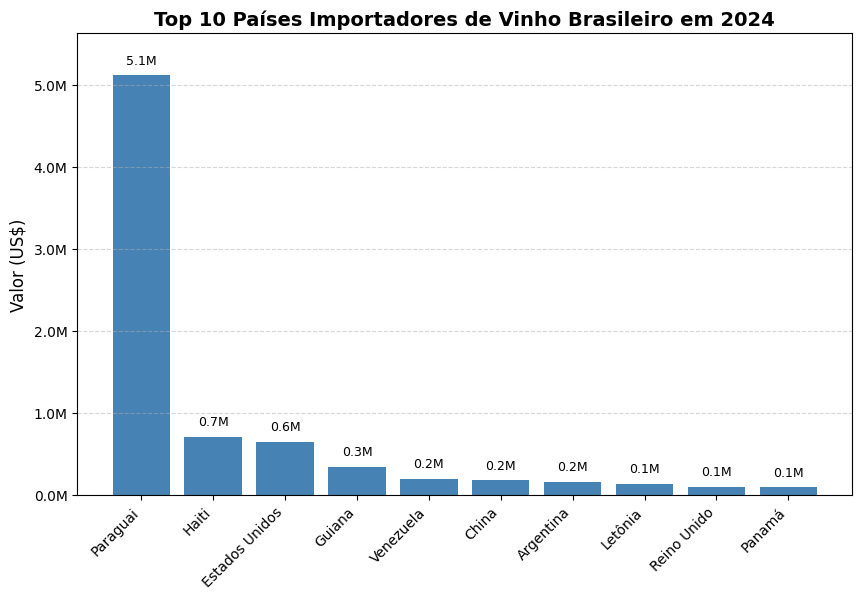

In [38]:
#Limita√ß√£o: n√£o mostra se est√£o crescendo ou caindo
#bom para mostrar os "campe√µes" de longo prazo

#pr√≥ximo gr√°fico √©: os top pa√≠ses em 2024 (podendo escolher o ano que quiser hehe)

ano_escolhido = 2024
vinhos_ano = vinhos[vinhos['Ano'] == ano_escolhido]
ranking_ano = vinhos_ano.groupby('Pa√≠s')['Valor_USD'].sum().sort_values(ascending=False).head(10)

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(ranking_ano.index, ranking_ano.values, color='steelblue')

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 1e5, f'{height/1e6:.1f}M', ha='center', va='bottom', fontsize=9)

ax.set_ylabel('Valor (US$)', fontsize=12)
ax.set_title(f'Top 10 Pa√≠ses Importadores de Vinho Brasileiro em {ano_escolhido}', fontsize=14, fontweight='bold')

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))

ax.set_xticks(range(len(ranking_ano)))
ax.set_xticklabels(ranking_ano.index, rotation=45, ha='right')
ax.grid(axis='y', linestyle='--', alpha=0.5)
ax.set_ylim(0, ranking_ano.max() * 1.1) #pra ajustar o limite do eixo y, deixando um espa√ßo em cima das barras, de acordo com o valor m√°ximo

plt.show()


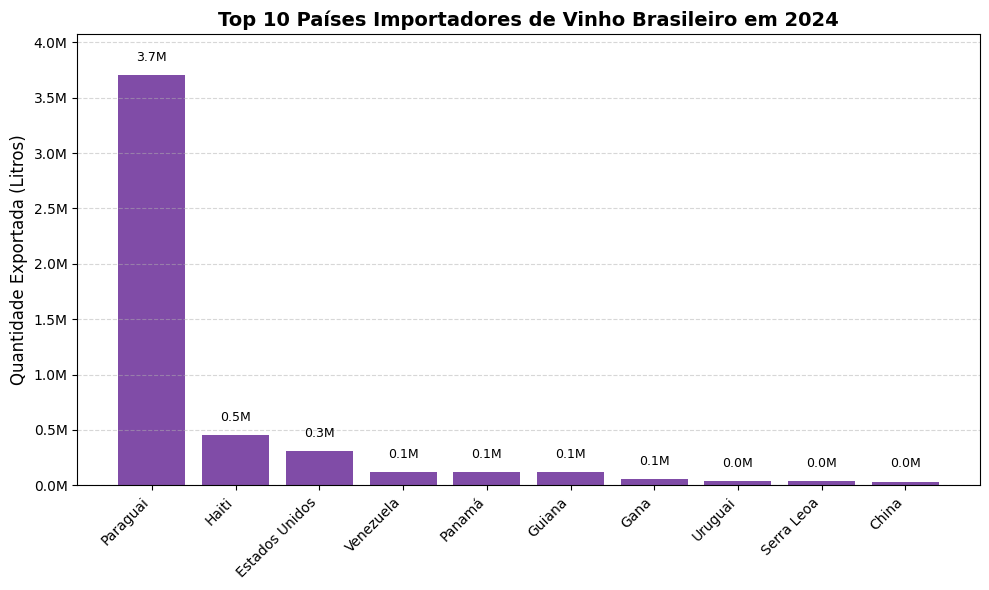

In [39]:
#quero fazer tamb√©m um igual a esse s√≥ que com a quantidade em litros tamb√©m 
#pode n√£o ser muito relevante, mas acho que √© v√°lido ter ele :)


ranking_ano = vinhos_ano.groupby('Pa√≠s')['Quantidade_L'].sum().sort_values(ascending=False).head(10)

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(ranking_ano.index, ranking_ano.values, color='indigo', alpha=0.7)

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 1e5, f'{height/1e6:.1f}M', ha='center', va='bottom', fontsize=9)

ax.set_ylabel(f'Quantidade Exportada (Litros)', fontsize=12)
ax.set_title(f'Top 10 Pa√≠ses Importadores de Vinho Brasileiro em {ano_escolhido}', fontsize=14, fontweight='bold')

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))

ax.set_xticks(range(len(ranking_ano)))
ax.set_xticklabels(ranking_ano.index, rotation=45, ha='right')
ax.grid(axis='y', linestyle='--', alpha=0.5)
ax.set_ylim(0, ranking_ano.max() * 1.1)

plt.tight_layout()
plt.show()

In [32]:
#o foda nesses dois gr√°ficos √© que o paraguai, por exemplo, tem um valor muuuuuuuito mais alto entao as outras 
#barras quando vai chegando no final do ranking ficam min√∫sculas e n√£o da pra ver nem fazer nenhuma compara√ß√£o entre elas..

#o que d√° pra fazer, caso a gente siga com esses gr√°ficos no relat√≥rio final, √© talvez excluir os primeiros 3 pa√≠ses ou algo assim do ranking
#pq ai fica vis√≠vel o que que rola com o restante dos pa√≠ses!!

#uma an√°lise legal que d√° pra fazer √© comparar esse gr√°fico com o gr√°fico de valor, que a√≠ mostra quem ta importando 
#vinho mais barato ou caro//quem t√° pagando mais caro ou barato por litro
#falando nisso, vou fazer um gr√°fico valor por litro entre os pa√≠ses agora :)


#Seguindo adiante ent√£o:

#primeiro passo √© fazer uma nova coluna no df com o pre√ßo por litro:
#LEMBRANDO que pode ter a quantidade 0 frequentemente, ent√£o tem que se preparar pra esses casos:


#vinhos['Preco_Litro'] = vinhos.apply(lambda row: row['Valor_USD'] / row['Quantidade_L'] if row['Quantidade_L'] > 0 else 0, axis=1)


#explica√ß√£o do que que √© esse lambda e como funciona isso aqui:

#lambda √© uma forma abreviada de criar uma fun√ß√£o simples e r√°pida. √â o mesmo que def, s√≥ que inline (sem nome) -> em def seria def nome_funcao(etc)
#aqui, row √© uma linha do dataframe, passada linha por linha pela fun√ß√£o apply() do pandas
#vinhos.apply(lambda row: row['Valor_USD'] / row['Quantidade_L'], axis=1) significa: 
# ‚ÄúPara cada linha (row) do dataframe pegue o Valor_USD e divida pelo Quantidade_L e retorne esse valor como o pre√ßo por litro.‚Äù


vinhos.loc[:, 'Preco_Litro'] = vinhos.apply(lambda row: row['Valor_USD'] / row['Quantidade_L'] if row['Quantidade_L'] > 0 else 0, axis=1)

#tive que usar o .loc tal para mostrar pro pandas que eu tava querendo editar a coluna toda do dataframe original, e n√£o s√≥ uma c√≥pia dela 
# (porque antes eu fiz vinhos = vinhos[(vinhos['Ano'] >= 2010) & (vinhos['Ano'] <= 2024)], l√° em cima!) a√≠ ele me mostra um warning pra confirmar isso. Agora t√° certinho!

vinhos


Pa√≠s   Ano  Quantidade_L  Valor_USD  \
5640                      Afeganist√£o  2010             0          0   
5641                    √Åfrica do Sul  2010             0          0   
5642  Alemanha, Rep√∫blica Democr√°tica  2010         27715     138666   
5643                           Angola  2010         33557     189891   
5644                         Anguilla  2010             0          0   
...                               ...   ...           ...        ...   
7750                           Tuvalu  2024             0          0   
7751                          Uruguai  2024         36729      62325   
7752                          Vanuatu  2024             0          0   
7753                        Venezuela  2024        122922     199418   
7754                           Vietn√£  2024            16         41   

      Preco_Litro  
5640     0.000000  
5641     0.000000  
5642     5.003283  
5643     5.658760  
5644     0.000000  
...           ...  
7750     0.000000  
7751     1.696888  
7752     0.000000  
7753     1.622313  
7754     2.562500  

[2115 rows x 5 columns]

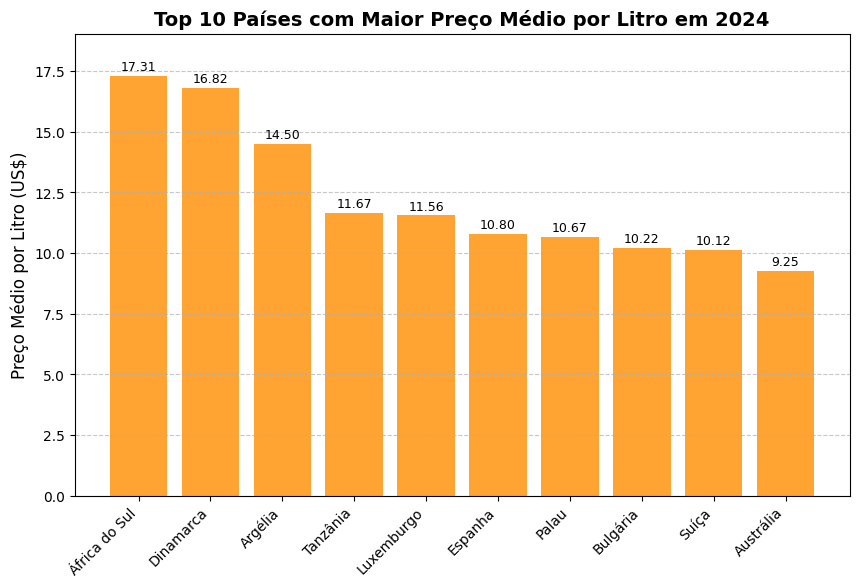

In [41]:
#Agora sim, fazendo o gr√°fico!

vinhos_ano = vinhos[vinhos['Ano'] == ano_escolhido] #tive que definir dnv pq eu mudei o df n√© ent√£o ele ainda n tava atualizado com a coluna nova
ranking_preco = vinhos_ano.groupby('Pa√≠s')['Preco_Litro'].mean().sort_values(ascending=False).head(10)

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(ranking_preco.index, ranking_preco.values, color='darkorange', alpha=0.8)

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.1, f'{height:.2f}', ha='center', va='bottom', fontsize=9)

ax.set_ylabel('Pre√ßo M√©dio por Litro (US$)', fontsize=12)
ax.set_title(f'Top 10 Pa√≠ses com Maior Pre√ßo M√©dio por Litro em {ano_escolhido}', fontsize=14, fontweight='bold')
ax.set_xticks(range(len(ranking_preco)))
ax.set_xticklabels(ranking_preco.index, rotation=45, ha='right')
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_ylim(0, ranking_preco.max() * 1.1)

plt.show()

In [ ]:
#esse gr√°fico √© bom pra:
#mostrar onde est√£o os mercados de maior valor agregado
#discutir estrat√©gias de exporta√ß√£o premium
#propor a√ß√µes de segmenta√ß√£o geogr√°fica e de produto
#etc e tal

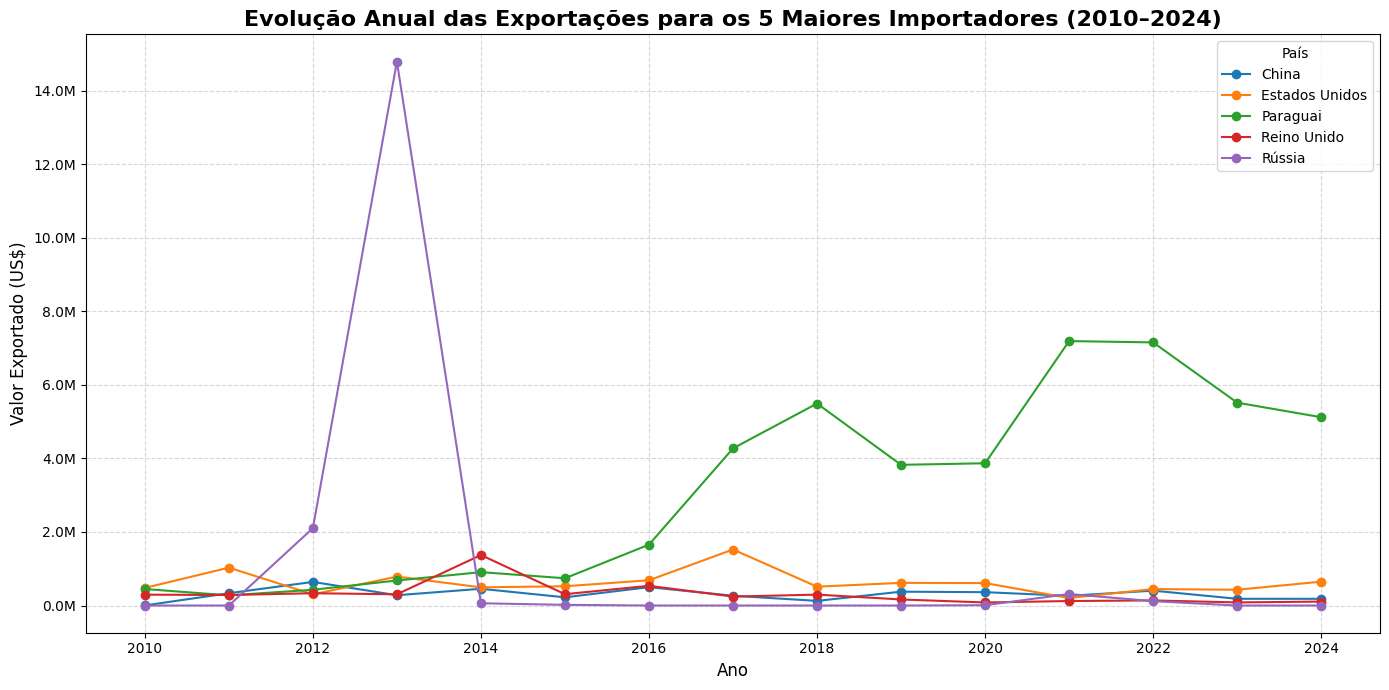

In [ ]:
#agora vamos para o gr√°fico de evolu√ß√£o ano a ano por pa√≠s (considerando apenas os top 5 pa√≠ses totais no per√≠odo)

top5_paises = vinhos.groupby('Pa√≠s')['Valor_USD'].sum().sort_values(ascending=False).head(5).index
vinhos_top5 = vinhos[vinhos['Pa√≠s'].isin(top5_paises)]
evolucao_top5 = vinhos_top5.groupby(['Ano', 'Pa√≠s'])['Valor_USD'].sum().unstack()

fig, ax = plt.subplots(figsize=(14, 7))
evolucao_top5.plot(ax=ax, marker='o')

ax.set_title('Evolu√ß√£o Anual das Exporta√ß√µes para os 5 Maiores Importadores (2010‚Äì2024)', fontsize=16, fontweight='bold')
ax.set_xlabel('Ano', fontsize=12)
ax.set_ylabel('Valor Exportado (US$)', fontsize=12)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
ax.grid(axis='both', linestyle='--', alpha=0.5)
ax.legend(title='Pa√≠s')

plt.show()

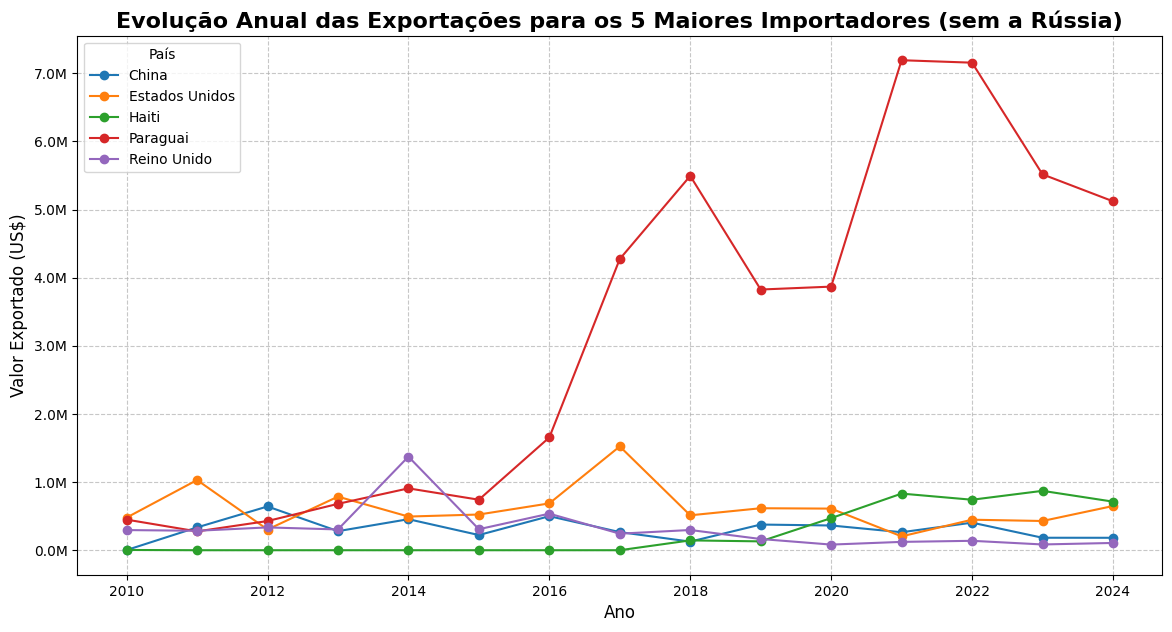

In [44]:
#esse pico escroto da russia ta atrapalhando a visualiza√ß√£o, podemos fazer um gr√°fico excluindo ela e pegando o proximo pais no top 5

ranking_geral = vinhos.groupby('Pa√≠s')['Valor_USD'].sum().sort_values(ascending=False)
top5_sem_russia = ranking_geral[ranking_geral.index != 'R√∫ssia'].head(5).index

vinhos_top5_alt = vinhos[vinhos['Pa√≠s'].isin(top5_sem_russia)]

evolucao_top5_alt = vinhos_top5_alt.groupby(['Ano', 'Pa√≠s'])['Valor_USD'].sum().unstack()

fig, ax = plt.subplots(figsize=(14, 7))
evolucao_top5_alt.plot(ax=ax, marker='o')

ax.set_title('Evolu√ß√£o Anual das Exporta√ß√µes para os 5 Maiores Importadores (sem a R√∫ssia)', fontsize=16, fontweight='bold')
ax.set_xlabel('Ano', fontsize=12)
ax.set_ylabel('Valor Exportado (US$)', fontsize=12)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
ax.grid(axis='both', linestyle='--', alpha=0.7)
ax.legend(title='Pa√≠s')

plt.show()



In [ ]:
#o bom desse gr√°fico √© que ele mostra tend√™ncia por pa√≠s, n√£o s√≥ quem comprou mais (olhando diretamente para a r√∫ssia üëÄ)
#paraguai t√° fort√≠ssimo nos ultimos anos!

#outra coisa que d√° pra fazer √© pegar o top pa√≠ses que importaram num per√≠odo espec√≠fico (tipo 2010 at√© 2015 por exemplo) e refazer esse gr√°fico. 
#pode ser que tenha algum(ns) pa√≠ses que importavam muito antes e diminu√≠ram recentemente. 
#por ex o Haiti, que importava pouquissimo antes de 2018 e come√ßou a importar tanto que virou o top 6..


In [ ]:
#acho que agora chega de fazer gr√°ficos desse df especificamente por enquanto. Vou tratar os dados clim√°ticos agora e depois vamos ver o que d√° pra fazer de correla√ß√µes e an√°lises :)


Parte Clim√°tica

In [79]:
#Depois de muita luta, escolhi quais vao ser as esta√ß√µes ideais para usar (documentado no docs)! S√£o elas: 
#Bento Gon√ßalves (A840) (principal!), Santana do Livramento (A804) e Vacaria (A880)

#ler os dados:

bento = pd.read_csv('BentoGoncalves.csv', sep=";", skiprows=10, encoding="latin1", decimal=",")
#livramento = pd.read_csv('SantanaDoLivramento.csv', sep=";", skiprows=10, encoding="latin1", decimal=",")
bage = pd.read_csv('Bage.csv', sep=";", skiprows=10, encoding="latin1", decimal=",")
vacaria = pd.read_csv('Vacaria.csv', sep=";", skiprows=10, encoding="latin1", decimal=",")



#adicionando coluna com nome da esta√ß√£o
bento["Estacao"] = "Bento Gon√ßalves"
#livramento["Estacao"] = "Santana do Livramento"
bage["Estacao"] = "Bage"
vacaria["Estacao"] = "Vacaria"

#juntando em um √∫nico dataframe
clima = pd.concat([bento, bage, vacaria], ignore_index=True)

clima
#tem v√°rios buracos nos dados......... :/ 
#Tenho a op√ß√£o de tentar procurar outras esta√ß√µes pra verse elas t√£o completas, mas no momento t√¥ com pregui√ßa 
#acho que vou ver se preencho os buracos com as m√©dias por enquanto pra ver se fica OK, mas isso pode enviesar os dados... tanto pra baixo quanto pra cima

#pesando os pr√≥s e contras das rotas:
### Faltam poucos meses -- (‚â§ 15‚Äì20 % do total entre 2010-2024, sem grandes ‚Äúburacos‚Äù consecutivos na vindima ‚Äî jan-mar) -> vindima √© a colheita das uvas (per√≠odo mais relevante pra n√≥s talvez)
### se sim, manter as esta√ß√µes e imputar os dados

### Faltam muitos meses ou h√° lacunas longas em 2 + anos cr√≠ticos (tem que ver quais seriam esses)
### se sim, √© melhor trocar a esta√ß√£o com maior falta (por ex usar a esta√ß√£o Canela se Bento tivesse buracos demais) E imputar lacunas pequenas nas demais

#ent√£o tenho que verificar a % de dados faltantes por esta√ß√£o.. Vamos l√°!


Data Medicao  NUMERO DE DIAS COM PRECIP. PLUV, MENSAL (AUT)(n√É¬∫mero)  \
0     2010-01-31                                               18.0        
1     2010-02-28                                               14.0        
2     2010-03-31                                               19.0        
3     2010-04-30                                               14.0        
4     2010-05-31                                               21.0        
..           ...                                                ...        
535   2024-08-31                                               12.0        
536   2024-09-30                                               12.0        
537   2024-10-31                                               13.0        
538   2024-11-30                                               11.0        
539   2024-12-31                                               20.0        

     PRECIPITACAO TOTAL, MENSAL (AUT)(mm)  \
0                                   278.4   
1                                   161.4   
2                                    58.4   
3                                   136.4   
4                                   158.6   
..                                    ...   
535                                  88.2   
536                                 128.0   
537                                 195.0   
538                                  96.6   
539                                 187.0   

     PRESSAO ATMOSFERICA, MEDIA MENSAL (AUT)(mB)  \
0                                          941.5   
1                                          942.1   
2                                          942.6   
3                                          946.2   
4                                          946.0   
..                                           ...   
535                                        909.0   
536                                        906.6   
537                                        906.1   
538                                        904.9   
539                                        903.5   

     TEMPERATURA MEDIA, MENSAL (AUT)(√Ç¬∞C)  \
0                                    21.9   
1                                    23.0   
2                                    20.7   
3                                    17.6   
4                                    14.3   
..                                    ...   
535                                  12.8   
536                                  16.2   
537                                  16.5   
538                                  18.3   
539                                  17.9   

     VENTO, VELOCIDADE MAXIMA MENSAL (AUT)(m/s)  \
0                                           7.0   
1                                           9.7   
2                                           7.0   
3                                           8.5   
4                                           6.8   
..                                          ...   
535                                        10.3   
536                                        13.5   
537                                        11.2   
538                                         9.0   
539                                         9.9   

     VENTO, VELOCIDADE MEDIA MENSAL (AUT)(m/s)  Unnamed: 7          Estacao  
0                                          2.5         NaN  Bento Gon√ßalves  
1                                          2.8         NaN  Bento Gon√ßalves  
2                                          2.2         NaN  Bento Gon√ßalves  
3                                          2.4         NaN  Bento Gon√ßalves  
4                                          2.2         NaN  Bento Gon√ßalves  
..                                         ...         ...              ...  
535                                        3.7         NaN          Vacaria  
536                                        4.1         NaN          Vacaria  
537                                        3.9         NaN  

In [94]:
#Para que a fun√ß√£o falta_pct seja √∫til, preciso selecionar quais colunas v√£o ser usadas nas an√°lises. Ent√£o, vamos remover as que n√£o s√£o t√£o relevantes!
#Vou manter: frequ√™ncia de chuva(num. de dias c precip.), precipita√ß√£o total e temperatura m√©dia! A coluna esta√ß√£o e data v√£o ficar tamb√©m.

cols_manter = {
    'Data Medicao' : 'Data',   
    'NUMERO DE DIAS COM PRECIP. PLUV, MENSAL (AUT)(n√É¬∫mero)': 'DiasChuva',
    'PRECIPITACAO TOTAL, MENSAL (AUT)(mm)': 'PrecipTotal',
    'TEMPERATURA MEDIA, MENSAL (AUT)(√Ç¬∞C)': 'TempMedia',
    'Estacao': 'Estacao'          
}

#aproveitar e j√° renomear elas tbm

clima_sel = clima[list(cols_manter.keys())].rename(columns=cols_manter)

#converte a data para datetime e define como √≠ndice
clima_sel['Data'] = pd.to_datetime(clima_sel['Data'])  
clima_sel = clima_sel.set_index('Data')

clima_sel


#OK!


DiasChuva  PrecipTotal  TempMedia          Estacao
Data                                                          
2010-01-31       18.0        278.4       21.9  Bento Gon√ßalves
2010-02-28       14.0        161.4       23.0  Bento Gon√ßalves
2010-03-31       19.0         58.4       20.7  Bento Gon√ßalves
2010-04-30       14.0        136.4       17.6  Bento Gon√ßalves
2010-05-31       21.0        158.6       14.3  Bento Gon√ßalves
...               ...          ...        ...              ...
2024-08-31       12.0         88.2       12.8          Vacaria
2024-09-30       12.0        128.0       16.2          Vacaria
2024-10-31       13.0        195.0       16.5          Vacaria
2024-11-30       11.0         96.6       18.3          Vacaria
2024-12-31       20.0        187.0       17.9          Vacaria

[540 rows x 4 columns]

In [ ]:
#criando um √≠ndice mensal completo

idx_full = pd.date_range('2010-01-01', '2024-12-31', freq='ME')


#definindo quais colunas clim√°ticas contam
clima_cols = ['TempMedia', 'PrecipTotal', 'DiasChuva']   #pra evitar que a coluna estacao entre na contagem de NaNs e atrapalhe


#fun√ß√£o pra contar os NaNs e calcular a porcentagem de dados faltantes
def falta_pct(df_est):
    df_alinh = df_est.reindex(idx_full)

    sub = df_alinh[clima_cols]          # s√≥ vari√°veis de interesse

    any_nan  = sub.isna().any(axis=1).sum()
    all_nan  = sub.isna().all(axis=1).sum()
    total    = len(idx_full)

    return pd.Series({
        '%‚â•1 NaN':   any_nan  / total * 100,
        '%Todos NaN': all_nan / total * 100
    })


faltas = (clima_sel.groupby('Estacao').apply(falta_pct, include_groups=False))
print(faltas)


                  %‚â•1 NaN  %Todos NaN
Estacao                              
Bage             7.777778    1.666667
Bento Gon√ßalves  7.222222    1.111111
Vacaria          8.333333    3.333333


In [ ]:
#Com esse resultado, temos que bento e vacaria est√£o aceit√°veis, mas livramento tem muitos dados faltando. Ent√£o, vou trocar ela por Bag√©.
#Como eu s√≥ substitui a esta√ß√£o l√° em cima no c√≥digo, pra quem t√° vendo pela primeira vez vai parecer como se eu nunca nem tivesse usado Santana do Livramento hehe
#mas eu usei e ela tava uma merda!